In [1]:
# WHY DOESN'T THE INSTALL WORK????!!!!! >:O
import sys
sys.path.insert(1, '../tornado_mod')

In [3]:
import drift_detection.__init__ as detectors
detector_names = [d for d in dir(detectors) if (not d.startswith('__')) and (d != 'BDDM')]
detectors = [ getattr(detectors, d)() for d in detector_names ]
detectors

In [4]:
import os
from importlib import reload

In [5]:
from classifier.__init__ import *
from streams.generators.__init__ import *

In [6]:
from run_experiments import create_datastreams, run_trials

In [7]:
names = ['high_noise', 'low_noise', 'gradual_drift', 'abrupt_drift', 'long_concepts', 'short_concepts']

In [5]:
MIMIC.set_path_to_data(os.path.abspath('mimic_bow.csv'))

streams = [MIMIC]
noise_rates = [0.4, 0.02, 0.1, 0.1, 0.1, 0.1]
concept_lens = [1000, 1000, 1000, 1000, 2000, 250]
transition_lens = [50, 50, 250, 0, 50, 50]

all_drift_locs = []
for name, noise, con_len, tran_len in zip(names, noise_rates, concept_lens, transition_lens):

    drift_locs = create_datastreams(
        './mimic_data/'+name, 
        streams, 
        n_trials=2, 
        stream_kwargs={
            'concept_length': con_len,
            'noise_rate': noise,
            'transition_length': tran_len,
            'n_priorities': 4, 
            'n_concepts': 2
        }
    )
    
    all_drift_locs.append(drift_locs)

You are going to generate a MIMIC data stream containing 2000 instances, and 1 concept drifts; 
where they appear at every 1000 instances.
You can find the generated files in ./mimic_data/high_noise/MIMIC/MIMIC_0.arff!
You are going to generate a MIMIC data stream containing 2000 instances, and 1 concept drifts; 
where they appear at every 1000 instances.
You can find the generated files in ./mimic_data/high_noise/MIMIC/MIMIC_1.arff!
You are going to generate a MIMIC data stream containing 2000 instances, and 1 concept drifts; 
where they appear at every 1000 instances.
You can find the generated files in ./mimic_data/low_noise/MIMIC/MIMIC_0.arff!
You are going to generate a MIMIC data stream containing 2000 instances, and 1 concept drifts; 
where they appear at every 1000 instances.
You can find the generated files in ./mimic_data/low_noise/MIMIC/MIMIC_1.arff!
You are going to generate a MIMIC data stream containing 2000 instances, and 1 concept drifts; 
where they appear at every 100

In [6]:
all_drift_locs

[{'MIMIC': [1000]},
 {'MIMIC': [1000]},
 {'MIMIC': [1000]},
 {'MIMIC': [1000]},
 {'MIMIC': [2000]},
 {'MIMIC': [250]}]

In [8]:
all_drift_locs = [
 {'MIMIC': [1000]},
 {'MIMIC': [1000]},
 {'MIMIC': [1000]},
 {'MIMIC': [1000]},
 {'MIMIC': [2000]},
 {'MIMIC': [250]}
]

In [9]:
pairs = [
    [model, thingy, detector] for detector in detectors
    for (model, thingy) in [
             [NaiveBayes, 'nominal'], 
             [Perceptron, 'numeric'], 
             [HoeffdingTree, 'nominal']
    ]
]

for name, locs in zip(names, all_drift_locs):
    run_trials('mimic_data/'+name, 
               'mimic_results/'+name, 
               locs, 
               pairs)

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/mimic_results/high_noise/MIMIC/MIMIC_1/20200630_235415/" is created.
NB + ADWIN [0.431, 1526.12, 1217.9214338665645] [250, [0, 0], 1, 1, 7.232, 17.858263000334773]
PR + ADWIN [0.4302, 93.808, 362.20529267501433] [104, [1105, 1], 0, 0, 7.288, 15.756980001015108]
HT + ADWIN [0.4303, 1544.16, 3876.7543993246527] [88, [1089, 1], 0, 0, 7.28, 14.656334000278548]
NB + BWAF [0.4297, 1528.84, 1653.30962520855] [71, [1072, 1], 1, 0, 1.024, 72.5749729994618]
PR + BWAF [0.4895, 93.52, 865.5973221732119] [250, [0, 0], 0, 1, 1.024, 101.6210810002276]
HT + BWAF [0.4297, 1544.664, 3808.9733305990885] [71, [1072, 1], 1, 0, 1.024, 42.53881000076376]
NB + CDDM [0.4762, 1519.432, 43.5748561835112] [7, [1008, 1], 130, 0, 1.608, 0.3297769999335287]
PR + CDDM [0.5238, 93.616, 8.483236538154415] [13, [1014, 1], 137, 0, 1.192, 0.2040020000322329]
HT + CDDM [0.4762, 1535.288, 79.04713483088699] [7, [1008, 1], 130, 0, 1.608, 0.1492060001

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:162: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


NB + ADWIN [0.4303, 1524.264, 1108.7097366896614] [250, [0, 0], 1, 1, 6.68, 12.624684999082092]
PR + ADWIN [0.5435, 93.456, 19.41808968172154] [250, [0, 0], 2, 1, 4.616, 0.7608759992763225]
HT + ADWIN [0.3508, 15370.384, 8589.03642149221] [250, [0, 0], 1, 1, 8.048, 36.344423002674375]
NB + BWAF [0.3872, 1529.32, 1825.505644505938] [80, [1081, 1], 1, 0, 1.024, 73.24053599859326]
PR + BWAF [0.3754, 93.616, 411.2184233529206] [96, [1097, 1], 0, 0, 1.024, 49.285328005453266]
HT + BWAF [0.3872, 1545.144, 3960.2956827902744] [80, [1081, 1], 1, 0, 1.024, 43.77973499890686]
NB + CDDM [0.4286, 1519.112, 14.379810909531443] [4, [1005, 1], 84, 0, 1.136, 0.126212999703057]
PR + CDDM [0.0, 93.368, 0.3079860000525514] [5, [1006, 1], 97, 0, 0.872, 0]
HT + CDDM [0.4286, 1534.968, 28.66087070242429] [4, [1005, 1], 84, 0, 1.136, 0.08459200012111978]
NB + CUSUM [0.4043, 1524.552, 969.9213244427938] [250, [0, 0], 1, 1, 0.88, 3.178797997406946]
PR + CUSUM [0.35, 93.392, 847.1247020356714] [250, [0, 0], 0, 

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + ADWIN [0.4516, 1523.72, 711.1934793656474] [250, [0, 0], 2, 1, 6.592, 10.144793997142187]
PR + ADWIN [0.4296, 93.744, 322.54392639765683] [196, [1197, 1], 1, 0, 7.28, 15.132227000549392]
HT + ADWIN [0.5769, 1535.512, 198.16475957463808] [250, [0, 0], 2, 1, 4.664, 0.7317369993415923]
NB + BWAF [0.4467, 1529.544, 2006.1833083625515] [14, [1015, 1], 0, 0, 1.024, 84.78305499875205]
PR + BWAF [0.4586, 93.776, 430.53244456814355] [9, [1010, 1], 0, 0, 1.024, 54.87852100281998]
HT + BWAF [0.4457, 14779.376, 4170.904231845952] [14, [1015, 1], 0, 0, 1.024, 45.979932000136614]
NB + CDDM [0.55, 1519.304, 39.04216957539575] [3, [1004, 1], 106, 0, 1.584, 0.2959409998766205]
PR + CDDM [0.8, 93.456, 1.9688562956616806] [1, [1002, 1], 122, 0, 1.0, 0.05240999985289818]
HT + CDDM [0.55, 1535.16, 74.3867565504388] [3, [1004, 1], 106, 0, 1.584, 0.15432000031978532]
NB + CUSUM [0.4184, 1526.408, 1247.3106732779797] [250, [0, 0], 1, 1, 0.88, 4.197494002028179]
PR + CUSUM [0.4266, 93.68, 282.956097964415

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + ADWIN [0.5063, 1529.832, 1680.9910409826898] [51, [1052, 1], 0, 0, 7.24, 24.859136000486615]
PR + ADWIN [0.4821, 93.616, 348.97703316642037] [132, [1133, 1], 1, 0, 7.368, 16.61813799637457]
HT + ADWIN [0.497, 1550.752, 8379.277061685798] [250, [0, 0], 0, 1, 7.416, 24.204363998705958]
NB + BWAF [0.5141, 1530.6, 1911.3615424523687] [9, [1010, 1], 0, 0, 1.024, 91.36764500181016]
PR + BWAF [0.4985, 93.68, 435.33763757727684] [10, [1011, 1], 0, 0, 1.024, 53.19884699474642]
HT + BWAF [0.5141, 1545.92, 4168.838041213576] [9, [1010, 1], 0, 0, 1.024, 45.57317099761349]
NB + CDDM [0.4762, 1519.304, 41.584891720958694] [8, [1009, 1], 100, 0, 1.608, 0.3186049998475937]
PR + CDDM [0.6667, 93.424, 3.624661855155864] [0, [1001, 1], 95, 0, 1.056, 0.08132100037983037]
HT + CDDM [0.4762, 1535.128, 85.50356659588942] [8, [1009, 1], 100, 0, 1.608, 0.1611239986232249]
NB + CUSUM [0.4933, 1525.64, 1171.426642909637] [250, [0, 0], 1, 1, 0.88, 4.034010006535027]
PR + CUSUM [0.47, 93.712, 274.102484058857

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + ADWIN [0.4225, 1527.88, 1613.1105043705247] [109, [1110, 1], 1, 0, 7.36, 23.71570899458675]
PR + ADWIN [0.4597, 93.776, 121.53982995459955] [250, [0, 0], 2, 1, 6.048, 5.041023001467693]
HT + ADWIN [0.3131, 28362.464, 3476.7057934150216] [76, [1077, 1], 1, 0, 7.392, 16.2808899999618]
NB + BWAF [0.4111, 1528.584, 1950.346980550421] [26, [1027, 1], 0, 0, 1.024, 83.8098469967008]
PR + BWAF [0.3736, 93.84, 420.95664511771247] [38, [1039, 1], 0, 0, 1.024, 54.31129500720999]
HT + BWAF [0.3114, 28362.248, 3693.7388790356636] [26, [1027, 1], 0, 0, 1.024, 46.22514300126568]
NB + CDDM [0.3529, 1519.496, 35.43042687260822] [12, [1013, 1], 95, 0, 1.44, 0.29444500023600995]
PR + CDDM [0.4425, 93.52, 818.1453775341652] [250, [0, 0], 0, 1, 4.992, 23.249058987858007]
HT + CDDM [0.589, 1552.8, 8531.633673967008] [250, [0, 0], 0, 1, 4.992, 18.54414700255802]
NB + CUSUM [0.4137, 1527.624, 1553.487680449507] [136, [1137, 1], 0, 0, 0.88, 5.223052999554056]
PR + CUSUM [0.439, 93.552, 810.374196513294] [

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + ADWIN [0.4277, 1528.232, 1604.2683661635238] [148, [1149, 1], 1, 0, 7.28, 22.41026399724433]
PR + ADWIN [0.4194, 93.616, 771.6229505108458] [250, [0, 0], 1, 1, 7.96, 37.98199899165411]
HT + ADWIN [0.4558, 1537.08, 642.7714977698997] [211, [1212, 1], 2, 0, 5.36, 2.0773850005753047]
NB + BWAF [0.4158, 1529.096, 1800.7082971475938] [25, [1026, 1], 0, 0, 1.024, 85.88339800598987]
PR + BWAF [0.5145, 93.648, 154.64068299161227] [210, [1211, 1], 2, 0, 1.024, 17.505039999377914]
HT + BWAF [0.3528, 15129.584, 3856.415849260884] [21, [1022, 1], 0, 0, 1.024, 46.668781995322206]
NB + CDDM [0.3548, 1519.528, 60.441332127084024] [8, [1009, 1], 60, 0, 1.928, 0.4715100012617768]
PR + CDDM [0.3793, 93.36, 12.258052831384703] [12, [1013, 1], 61, 0, 1.272, 0.27198100042369333]
HT + CDDM [0.3548, 1535.384, 122.20983590441392] [148, [1149, 1], 35, 0, 1.928, 0.24329900088559953]
NB + CUSUM [0.4376, 1527.944, 1425.7166922006945] [190, [1191, 1], 0, 0, 0.88, 4.963555996255309]
PR + CUSUM [0.4597, 93.584,

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + ADWIN [0.4791, 1534.696, 3626.9635093408397] [135, [2136, 1], 1, 0, 7.928, 50.403869007368485]
PR + ADWIN [0.4712, 93.936, 725.0189410583516] [229, [2230, 1], 0, 0, 8.048, 33.429582994813245]
HT + ADWIN [0.4811, 1549.912, 8202.340681154965] [230, [2231, 1], 1, 0, 7.952, 33.77284100815814]
NB + BWAF [0.4802, 1535.304, 3861.1715551974157] [58, [2059, 1], 0, 0, 1.024, 170.75910498988378]
PR + BWAF [0.4838, 93.872, 861.8138447413912] [19, [2020, 1], 0, 0, 1.024, 104.48542699259633]
HT + BWAF [0.4802, 1550.624, 8772.190014614807] [58, [2059, 1], 0, 0, 1.024, 91.51295200217646]
NB + CDDM [0.4211, 1519.496, 40.179529869874386] [1, [2002, 1], 250, 0, 1.56, 0.3160649998790177]
PR + CDDM [0.4211, 93.584, 8.118947906041285] [13, [2014, 1], 231, 0, 1.192, 0.17561600043336512]
HT + CDDM [0.4211, 1535.352, 73.8666613751775] [1, [2002, 1], 250, 0, 1.56, 0.13597500037576538]
NB + CUSUM [0.4798, 1534.216, 3465.397005194518] [167, [2168, 1], 0, 0, 0.88, 11.261208990617888]
PR + CUSUM [0.4762, 93.84

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + ADWIN [0.4225, 1535.176, 3731.939702865475] [103, [2104, 1], 1, 0, 7.952, 51.6260149761365]
PR + ADWIN [0.4598, 93.936, 380.394574715865] [86, [2087, 1], 2, 0, 7.336, 16.799698993054335]
HT + ADWIN [0.4248, 1550.968, 9169.194329229413] [118, [2119, 1], 1, 0, 7.984, 35.48617102069329]
NB + BWAF [0.4514, 1524.84, 1048.125231085578] [18, [2019, 1], 4, 0, 1.024, 45.33875500601425]
PR + BWAF [0.4186, 93.744, 881.0380757772691] [14, [2015, 1], 0, 0, 1.024, 103.42884102419703]
HT + BWAF [0.4514, 1540.696, 2455.981651354705] [18, [2019, 1], 4, 0, 1.024, 26.885540974035393]
NB + CDDM [0.5333, 1519.4, 31.89467049924133] [8, [2009, 1], 201, 0, 1.392, 0.23549399975308916]
PR + CDDM [0.0, 93.52, 0.77910291201988] [88, [2089, 1], 123, 0, 0.96, 0.02115400002367096]
HT + CDDM [0.5333, 1535.256, 58.2699744581987] [171, [2172, 1], 118, 0, 1.392, 0.1424000020051608]
NB + CUSUM [0.4248, 1535.144, 3531.1401433059473] [118, [2119, 1], 0, 0, 0.88, 11.852195003484667]
PR + CUSUM [0.407, 93.84, 768.024972

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + ADWIN [0.4497, 1521.064, 408.75960252651566] [60, [311, 1], 0, 0, 5.864, 4.546290010694065]
PR + ADWIN [0.518, 93.456, 212.39145183699293] [250, [0, 0], 0, 1, 7.4, 9.892651991322055]
HT + ADWIN [0.454, 1536.192, 773.4368389756128] [75, [326, 1], 0, 0, 5.864, 2.972917991428403]
NB + BWAF [0.4753, 1520.648, 313.8687171076526] [87, [338, 1], 0, 0, 1.024, 13.079437998385401]
PR + BWAF [0.51, 93.36, 226.9949942929088] [250, [0, 0], 0, 1, 1.024, 27.242369989835424]
HT + BWAF [0.4753, 1535.968, 677.0677298127339] [87, [338, 1], 0, 0, 1.024, 7.7885939990665065]
NB + CDDM [0.606, 1523.24, 938.3912341418181] [250, [0, 0], 0, 1, 5.808, 9.202071003528545]
PR + CDDM [0.506, 93.392, 213.71768543576763] [250, [0, 0], 0, 1, 5.784, 5.854483000803157]
HT + CDDM [0.606, 1538.56, 2090.6246236027073] [250, [0, 0], 0, 1, 5.784, 5.237598998064641]
NB + CUSUM [0.606, 1523.24, 931.6110260315327] [250, [0, 0], 0, 1, 0.88, 3.1283770013033063]
PR + CUSUM [0.52, 93.424, 207.42036745923542] [250, [0, 0], 0, 1,

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + ADWIN [0.468, 1523.848, 872.577003700826] [250, [0, 0], 0, 1, 7.432, 12.22952000262012]
PR + ADWIN [0.5336, 93.552, 106.85796580673923] [250, [0, 0], 1, 1, 5.944, 4.950970003847033]
HT + ADWIN [0.5178, 1538.144, 1588.6657321943858] [250, [0, 0], 1, 1, 6.512, 6.502522003756894]
NB + BWAF [0.5071, 1520.648, 245.99900502562377] [109, [360, 1], 0, 0, 1.024, 11.33977299923572]
PR + BWAF [0.5138, 93.552, 97.3188344087248] [31, [282, 1], 0, 0, 1.024, 11.735914003111247]
HT + BWAF [0.5071, 1535.968, 546.7874511923583] [109, [360, 1], 0, 0, 1.024, 7.037880995994783]
NB + CDDM [0.5, 1518.984, 3.8490883980557555] [2, [253, 1], 22, 0, 0.984, 0.019521000467648264]
PR + CDDM [0.494, 93.36, 215.72045594894007] [250, [0, 0], 0, 1, 4.992, 7.1965409952099435]
HT + CDDM [0.468, 1539.168, 1971.2141843074278] [250, [0, 0], 0, 1, 4.992, 5.599945995527378]
NB + CUSUM [0.468, 1523.848, 869.6502554112158] [250, [0, 0], 0, 1, 0.88, 3.1572119860356906]
PR + CUSUM [0.504, 93.36, 210.3944653290455] [250, [0, 

# Create LaTeX Tables and CD Diagrams

In [3]:
from parse_results import *
import os

In [4]:
category = 'mimic'

In [5]:
results = parse_results(f'{category}_results')
results.head()

,Detector,Model,TP,FN,FP,Err-rate,Memory,Runtime,Total Delay,d0,d1,d2,d3
1,ADWIN,NAIVE BAYES,1.0,0.0,1.0,42.85,1534.94,1885.68,103.0,long_concepts,MIMIC,MIMIC_0,20200701_005624
2,ADWIN,PERCEPTRON,1.0,0.0,2.0,45.70,99.85,271.53,86.0,long_concepts,MIMIC,MIMIC_0,20200701_005624
3,ADWIN,HOEFFDING TREE,1.0,0.0,1.0,44.50,1549.79,4246.41,118.0,long_concepts,MIMIC,MIMIC_0,20200701_005624
4,BWAF,NAIVE BAYES,1.0,0.0,4.0,44.07,1525.16,963.37,18.0,long_concepts,MIMIC,MIMIC_0,20200701_005624
5,BWAF,PERCEPTRON,1.0,0.0,0.0,42.96,94.41,498.06,14.0,long_concepts,MIMIC,MIMIC_0,20200701_005624


In [6]:
results = extend_metrics(results)
results.drop(columns=['d2', 'd3', 'Total Delay', 'TP', 'FN', 'FP'], inplace=True)
results.rename(columns={
    'd0': 'Mode', 
#     'd2': 'Datastream', 
    'd1': 'dataset_name'
}, inplace=True)
results['dataset_name'] = results['dataset_name'] + results['Model'] + results['Mode']
# a better order
results = results[[
    'Detector', 'Model', 'Mode', 'dataset_name', # admin
    'Precision', 'Recall', # main accuracy metrics
    'F1', 'Mean Delay', # secondary accuracy metrics
    'Memory', 'Runtime' # performance metrics
]]
results.head()

,Detector,Model,Mode,dataset_name,Precision,Recall,F1,Mean Delay,Memory,Runtime
1,ADWIN,NAIVE BAYES,long_concepts,MIMICNAIVE BAYESlong_concepts,0.500000,0.666667,0.571429,103.0,1534.94,1885.68
2,ADWIN,PERCEPTRON,long_concepts,MIMICPERCEPTRONlong_concepts,0.400000,0.666667,0.500000,86.0,99.85,271.53
3,ADWIN,HOEFFDING TREE,long_concepts,MIMICHOEFFDING TREElong_concepts,0.500000,0.666667,0.571429,118.0,1549.79,4246.41
4,BWAF,NAIVE BAYES,long_concepts,MIMICNAIVE BAYESlong_concepts,0.285714,0.666667,0.400000,18.0,1525.16,963.37
5,BWAF,PERCEPTRON,long_concepts,MIMICPERCEPTRONlong_concepts,0.666667,0.666667,0.666667,14.0,94.41,498.06


In [9]:
import parse_results
from importlib import reload 
parse_results = reload(parse_results)
process_results = parse_results.process_results

Writing LaTeX table to tables/mimic.tex


/anaconda3/envs/triage_drift_env/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Writing cd diagrams to figures/mimic.pdf


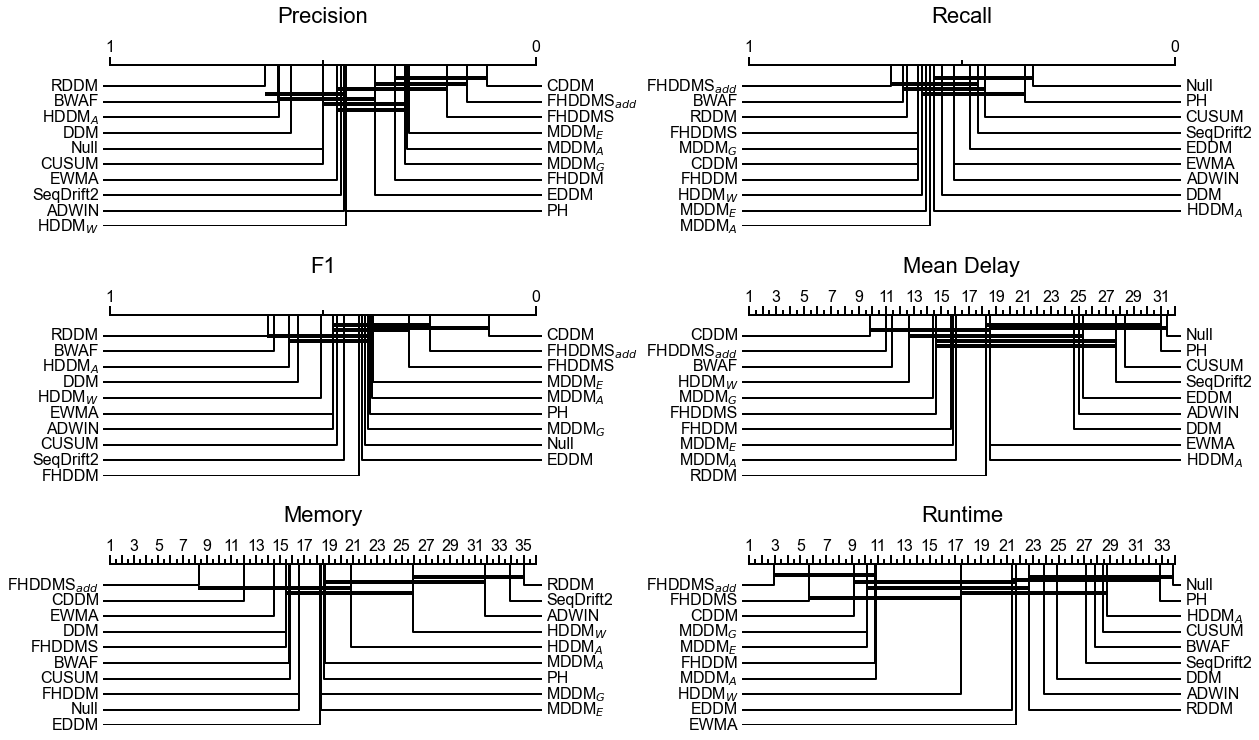

In [10]:
latex = process_results(
    results.drop( columns=['Model', 'Mode'] ), 
    groupby='Detector', 
    latex_path=f'tables/{category}.tex',
    fig_path=f'figures/{category}.pdf',
    bold_best=True,
    alpha=0.05
)

In [12]:
print(process_results(
    results[ results['Detector'].isin(['BDDM', 'BWAF', 'CDDM']) ]
        .drop( columns=['Model'] ), 
    groupby=['Detector', 'Mode'], 
    latex_path=f'tables/{category}_modes.tex',
#     fig_path='figures/benchmarks_modes.pdf',
    cd_diagram=False,
    bold_best=False
))

Writing LaTeX table to tables/mimic_modes.tex
\begin{tabular}{lrrrrrrr}
\toprule
     &                &    Precision &       Recall &           F1 &       Mean Delay &             Memory (bytes) &            Runtime (ms) \\
Detector & Mode &              &              &              &                  &                    &                    \\
\midrule
BWAF & Abrupt Drift &  0.62 (0.10) &  0.67 (0.00) &  0.64 (0.06) &    57.67 (68.32) &  3540.07 (4094.53) &   1057.06 (709.87) \\
     & Gradual Drift &  0.67 (0.00) &  0.67 (0.00) &  0.67 (0.00) &     10.83 (2.27) &   1054.35 (678.88) &   1096.62 (738.11) \\
     & High Noise &  0.56 (0.08) &  0.56 (0.16) &  0.55 (0.11) &   129.67 (89.15) &  2850.06 (4285.35) &   1149.15 (626.04) \\
     & Long Concepts &  0.54 (0.18) &  0.67 (0.00) &  0.58 (0.13) &    30.83 (19.27) &   1054.78 (679.08) &  1725.92 (1319.73) \\
     & Low Noise &  0.61 (0.08) &  0.67 (0.00) &  0.63 (0.04) &    48.33 (37.40) &  2638.54 (3743.81) &   1093.77 (733.88) \\